In [4]:
import numpy as np
import pandas as pd
import configparser
import time
from glob import glob
import ccxt

pd.set_option('precision', 9)
from data_provider import read_prices

In [7]:
exchange = ccxt.bitmex()
#exchange.timeframes.values()
get_symbols(exchange, 'XBT')

NameError: name 'get_symbols' is not defined

In [2]:
exchange = ccxt.binance()
exchange.iso8601(1500004800000)

'2017-07-14T04:00:00.000Z'

In [3]:
!. ~/Robots/Code/backup.sh

tar: Удаляется начальный `/' из имен объектов
/home/user/Robots/Code/TP/
/home/user/Robots/Code/TP/integrate.ipynb
/home/user/Robots/Code/TP/pr_LSTM.ipynb
/home/user/Robots/Code/TP/config.ini
/home/user/Robots/Code/TP/Pr_CNN.ipynb
/home/user/Robots/Code/TP/robot_02.ipynb
/home/user/Robots/Code/TP/TA_robots.py
/home/user/Robots/Code/TP/currencies.txt
/home/user/Robots/Code/TP/predictive.ipynb
/home/user/Robots/Code/TP/xgboost.R
/home/user/Robots/Code/TP/01-data provider.ipynb
/home/user/Robots/Code/TP/TA_robots.ipynb
/home/user/Robots/Code/TP/data_provider.py
/home/user/Robots/Code/TP/cash_data_read.py
/home/user/Robots/Code/TP/06-backtest_TA.ipynb
/home/user/Robots/Code/TP/Pr_automl.ipynb
/home/user/Robots/Code/TP/Reinforcement/
/home/user/Robots/Code/TP/Reinforcement/Information.ipynb
/home/user/Robots/Code/TP/Reinforcement/k-arms bandits.ipynb
/home/user/Robots/Code/TP/Reinforcement/.ipynb_checkpoints/
/home/user/Robots/Code/TP/Reinforcement/.ipynb_checkpoints/k-arms bandits-checkpoi

In [23]:
import pymc3 as pm
import theano.tensor as tt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib
from matplotlib import pyplot as plt

import json
s = json.load(open("data/bmh_matplotlibrc.json"))


In [8]:
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)

In [10]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [11]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [12]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [14]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2_log__]
>Metropolis: [lambda_1_log__]
100%|██████████| 15000/15000 [00:04<00:00, 3247.77it/s]
The number of effective samples is smaller than 25% for some parameters.


In [25]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


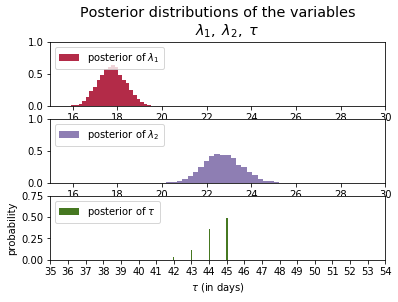

In [26]:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");